### `---------------Mandatory Information to fill------------`

### Group ID: 134
### Group Members Name with Student ID:
1. CHAKSHU
2. AASHAANK PRATAP
3. GALI JAHNAVI
4. SHIVAM SAHIL

`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Problem Statement

Develop a reinforcement learning agent using dynamic programming methods to solve the Dice game optimally. The agent will learn the optimal policy by iteratively evaluating and improving its strategy based on the state-value function and the Bellman equations.

# Scenario:
A player rolls a 6-sided die with the objective of reaching a score of **exactly** 100. On each turn, the player can choose to stop and keep their current score or continue rolling the die. If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If the player rolls any other number (2-6), that number is added to their score for that turn. The game ends when the player decides to stop and keep their score OR when the player's score reaches 100. The player wins if they reach a score of exactly 100, and loses if they roll a 1 when their score is below 100.



#Environment Details

* The environment consists of a player who can choose to either roll a 6-sided die or stop at any point.
* The player starts with an initial score (e.g., 0) and aims to reach a score of exactly 100.
* If the player rolls a 1, they lose all points accumulated in that turn and the turn ends. If they roll any other number (2-6), that number is added to their score for that turn.
* The goal is to accumulate a total of exactly 100 points to win, or to stop the game before reaching 100 points.

#### States
* State s: Represents the current score of the player, ranging from 0 to 100.
* Terminal States:
    * State s = 100: Represents the player winning the game by reaching the goal of 100 points.
    * State s = 0: Represents the player losing all points accumulated in the turn due to rolling a 1.


#### Actions
* Action a: Represents the decision to either "roll" the die or "stop" the game at the current score.
* The possible actions in any state s are either "roll" or "stop".


# Expected Outcomes:
1.	Use dynamic programming methods value iteration, policy improvement and policy evaluation to find the optimal policy for the Dice Game.
2.	Implement an epsilon-greedy policy for action selection during training to balance exploration and exploitation.
3.	Evaluate the agent's performance in terms of the probability of reaching exactly 100 points after learning the optimal policy.
4.	Use the agent's policy as the best strategy for different betting scenarios within the problem.


# Code Execution

### Initialize constants

In [7]:
import numpy as np

# Constants
goal = 100  # The target score a player aims to reach exactly
gamma = 1.0  # Discount factor, assuming no discounting (gamma = 1 means future rewards are not discounted)
prob_roll = 1/6  # Probability for each side of the die

# Initialize value function and policy
V = np.zeros(goal + 1)  # Value function array with an entry for each possible score from 0 to goal
policy = np.zeros(goal + 1, dtype=int)  # 0 for "stop", 1 for "roll"; default policy is to stop (will be optimized later)

# Design a DiceGame Environment (1M)

In [8]:
class DiceGameEnvironment:
    def __init__(self, goal=100, sides=6):
        self.goal = goal  # The target score to win the game
        self.sides = sides  # Number of sides on the die

    def roll_die(self):
        """Simulate rolling the die and return the result as an integer between 1 and the number of sides."""
        return np.random.randint(1, self.sides + 1)

    def step(self, current_score, action):
        """
        Take an action from the current score and return the new score and the reward.
        Parameters:
            current_score (int): The current score of the player.
            action (str): 'roll' or 'stop' indicating the player's action.
        Returns:
            tuple: A tuple containing the new score and the reward obtained.
        """
        if action == "stop":
            # If the player stops, the game ends and no additional reward is scored.
            return current_score, 0
        elif action == "roll":
            roll = self.roll_die()
            if roll == 1:
                # Rolling a 1 loses all points gained in this turn.
                return 0, -current_score  # Negative reward equal to the lost points.
            new_score = current_score + roll
            if new_score > self.goal:
                # If the score exceeds the goal, the player loses.
                return new_score, -100  # Large penalty for exceeding the goal.
            elif new_score == self.goal:
                # Exactly reaching the goal wins the game.
                return new_score, 100  # Large reward for winning.
            else:
                # Continue the game without immediate reward.
                return new_score, 0

    def is_terminal(self, score):
        """Check if the given score is a terminal state."""
        return score == 0 or score >= self.goal


### Define reward funtion

In [9]:
class DiceGameEnvironment:
    def __init__(self, goal=100, sides=6):
        self.goal = goal  # The target score to win the game
        self.sides = sides  # Number of sides on the die

    def roll_die(self):
        """Simulate rolling the die and return the result as an integer between 1 and the number of sides."""
        return np.random.randint(1, self.sides + 1)

    def calculate_reward(self, old_score, new_score, action):
        """
        Calculate the reward for the action taken.
        Parameters:
            old_score (int): The score before the action.
            new_score (int): The score after the action.
            action (str): 'roll' or 'stop' indicating the player's action.
        Returns:
            int: The reward resulting from the action.
        """
        if action == "stop":
            # No additional reward or penalty when stopping.
            return 0
        elif new_score == 0:
            # Rolling a 1 results in losing the turn's points.
            return -old_score
        elif new_score > self.goal:
            # Exceeding the goal results in a large penalty.
            return -100
        elif new_score == self.goal:
            # Reaching exactly the goal scores a large reward.
            return 100
        else:
            # No immediate reward for other rolls.
            return 0

    def step(self, current_score, action):
        """
        Take an action from the current score and return the new score and the reward.
        """
        if action == "stop":
            return current_score, self.calculate_reward(current_score, current_score, action)
        elif action == "roll":
            roll = self.roll_die()
            if roll == 1:
                return 0, self.calculate_reward(current_score, 0, action)
            new_score = current_score + roll
            return new_score, self.calculate_reward(current_score, new_score, action)

    def is_terminal(self, score):
        """Check if the given score is a terminal state."""
        return score == 0 or score >= self.goal

# Policy Iteration Function Definition (0.5M)

In [10]:
#For each state, Store old_policy of state s.
#Determine best_action based on maximum reward. Update policy[s] to best_action.
#Return stable when old policy = policy[s]

#-----write your code below this line---------

def policy_iteration(env, V, policy, gamma=1.0):
    """
    Perform policy iteration to find the optimal policy.
    Args:
        env (DiceGameEnvironment): The game environment.
        V (np.array): Value function, an array where V[s] is the value of state s.
        policy (np.array): Current policy, where policy[s] indicates the action chosen at state s.
        gamma (float): Discount factor.
    Returns:
        np.array: The optimal policy.
    """
    stable = False  # Track if the policy is stable
    while not stable:
        # Policy Evaluation
        V = policy_evaluation(env, policy, V, gamma)
        
        stable = True  # Assume the policy is stable
        # Policy Improvement
        for s in range(1, env.goal):  # iterate over all states except the terminal state
            old_action = policy[s]
            # Now find the best action by examining possible outcomes
            action_rewards = []
            
            # Calculate reward for stopping
            stop_reward = V[s]  # If you stop, the game ends with the current score
            action_rewards.append((stop_reward, 0))  # (reward, action)
            
            # Calculate reward for rolling
            roll_reward = 0
            for roll in range(1, env.sides + 1):
                if roll == 1:
                    new_state = 0
                    roll_reward += -s / env.sides  # Negative reward as you lose all points
                else:
                    new_state = s + roll
                    if new_state > env.goal:
                        roll_reward += -100 / env.sides
                    elif new_state == env.goal:
                        roll_reward += 100 / env.sides
                    else:
                        roll_reward += V[new_state] / env.sides
            
            action_rewards.append((roll_reward, 1))  # (reward, action)
            
            # Select the action which maximizes the expected reward
            best_action = max(action_rewards, key=lambda x: x[0])[1]
            policy[s] = best_action
            
            # Check if policy changed
            if old_action != best_action:
                stable = False
    
    return policy

def policy_evaluation(env, policy, V, gamma, theta=0.0001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    Args:
        env (DiceGameEnvironment): The game environment.
        policy (np.array): Current policy.
        V (np.array): Current value estimates.
        gamma (float): Discount factor.
        theta (float): A threshold of significant change for stopping evaluation.
    Returns:
        np.array: Updated value function.
    """
    while True:
        delta = 0
        for s in range(1, env.goal):
            v = V[s]
            if policy[s] == 0:  # Stop
                V[s] = 0  # If stop, no future rewards
            else:  # Roll
                V[s] = sum([env.step(s, 'roll')[1] * prob_roll for _ in range(1, env.sides + 1)])
            
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V


# Value Iteration Function Definition (0.5M)

In [11]:
# Iterate over all states except terminal state untill convergence

# Calculate expected returns V(s) for current policy by considering all possible actions.

#If action is stop:
        #Calculate reward for stopping and append to rewards.
#If action is roll:
        #For each possible roll outcome (1 to 6), Determine next_s based on roll.

# Update V(s) using the Bellman equation.

#Determine max_reward from rewards
#With probability epsilon, randomly choose a reward from rewards.

#Check convergence if delta is less than a small threshold.

#-----write your code below this line---------

def value_iteration(env, V, gamma=1.0, theta=0.0001):
    """
    Perform value iteration to find the optimal value function.
    Args:
        env (DiceGameEnvironment): The game environment.
        V (np.array): Value function, an array where V[s] is the value of state s.
        gamma (float): Discount factor.
        theta (float): A threshold for the stopping criterion.
    Returns:
        np.array: The optimal value function.
    """
    while True:
        delta = 0  # For checking convergence
        for s in range(1, env.goal):  # Iterate over all states except the terminal state
            if env.is_terminal(s):
                continue
            old_value = V[s]
            rewards = []

            # Consider the action 'stop'
            stop_reward = 0  # Reward for stopping is just the current value (no future rewards)
            rewards.append(stop_reward)

            # Consider the action 'roll'
            roll_rewards = np.zeros(env.sides)  # Array to hold rewards for each die outcome
            for roll in range(1, env.sides + 1):
                if roll == 1:
                    next_s = 0  # Rolling a 1 resets score
                    roll_rewards[roll - 1] = -s + gamma * V[next_s]  # Negative reward losing current score
                else:
                    next_s = min(s + roll, env.goal)
                    if next_s == env.goal:
                        roll_rewards[roll - 1] = 100 + gamma * V[next_s]  # Reward for reaching exactly 100
                    else:
                        roll_rewards[roll - 1] = gamma * V[next_s]  # No immediate reward, future value only

            # Calculate expected reward for rolling based on the probability distribution of dice outcomes
            expected_roll_reward = np.sum(roll_rewards * prob_roll)
            rewards.append(expected_roll_reward)

            # Update the value function using the Bellman equation
            max_reward = max(rewards)  # Choose the best action (maximize the reward)
            V[s] = max_reward  # Update the value function for state s

            # Check for convergence
            delta = max(delta, abs(old_value - V[s]))
        if delta < theta:
            break

    return V

# Executing Policy Iteration and Value Iteration Functions (1M)

Print all the iterations for both Policy and Value Iteration approaches separately. (Mandatory)

In [12]:
#Simulate the game for 100 states. Use the learned policy to get the actions.
#when its roll, randomly generate a number to find the reward.
#when its stop, get the respective reward
#determine the total cumulative reward

#-----write your code below this line---------
def simulate_game(env, policy, num_simulations=100):
    """
    Simulate the dice game for a given number of simulations using the learned policy.
    
    Args:
        env (DiceGameEnvironment): The game environment.
        policy (np.array): The learned policy, where policy[s] indicates the action at state s.
        num_simulations (int): Number of times to simulate the game.
        
    Returns:
        float: The average cumulative reward from all simulations.
    """
    total_rewards = 0
    
    for _ in range(num_simulations):
        current_score = 0  # Start from score 0
        game_reward = 0  # Initialize game reward

        while not env.is_terminal(current_score):
            action = "roll" if policy[current_score] == 1 else "stop"
            if action == "stop":
                # If stopping, the game ends, and we take the current score as the reward
                game_reward += current_score
                break
            else:
                # Simulate rolling the die
                result = env.roll_die()
                if result == 1:
                    # Lose all points accumulated in this turn and game ends
                    game_reward -= current_score
                    break
                else:
                    new_score = current_score + result
                    if new_score > env.goal:
                        # Exceeds the goal, large penalty
                        game_reward -= 100
                        break
                    elif new_score == env.goal:
                        # Exactly reaches the goal, large reward
                        game_reward += 100
                        break
                    else:
                        # Continue the game with updated score
                        current_score = new_score

        total_rewards += game_reward

    average_reward = total_rewards / num_simulations
    return average_reward



### Print the Learned Optimal Policy, Optimal Value Function (0.5M)

In [14]:
#-----write your code below this line---------
def print_policy_and_values(policy, V):
    """
    Print the learned policy and value function.
    
    Args:
        policy (np.array): The learned policy array where each index represents a state and
                            the value at that index represents the action to take (0 = stop, 1 = roll).
        V (np.array): The value function array where each index represents a state and
                      the value at that index represents the value of that state.
    """
    print("Learned Policy (0=stop, 1=roll):")
    for score in range(len(policy)):
        action = 'Stop' if policy[score] == 0 else 'Roll'
        print(f"Score {score}: {action}")

    print("\nOptimal Value Function:")
    for score in range(len(V)):
        print(f"Score {score}: {V[score]:.2f}")

# Assuming the DiceGameEnvironment, policy_iteration or value_iteration, and simulate_game functions are defined

# Initialize the game environment
env = DiceGameEnvironment(goal=100, sides=6)

# Initialize value function and policy
V = np.zeros(env.goal + 1)
policy = np.zeros(env.goal + 1, dtype=int)  # Start with all 'stop'

# Run policy iteration or value iteration to compute the optimal policy and value function
# Uncomment the appropriate method you want to use:
# V = value_iteration(env, V, gamma=1.0)
policy = policy_iteration(env, V, policy, gamma=1.0)

# Print the learned policy and value function
print_policy_and_values(policy, V)

# Optionally run simulation to see the average reward using the learned policy
average_reward = simulate_game(env, policy, num_simulations=100)
print(f"\nAverage Reward from Simulating the Game: {average_reward}")

Learned Policy (0=stop, 1=roll):
Score 0: Stop
Score 1: Stop
Score 2: Stop
Score 3: Stop
Score 4: Stop
Score 5: Stop
Score 6: Stop
Score 7: Stop
Score 8: Stop
Score 9: Stop
Score 10: Stop
Score 11: Stop
Score 12: Stop
Score 13: Stop
Score 14: Stop
Score 15: Stop
Score 16: Stop
Score 17: Stop
Score 18: Stop
Score 19: Stop
Score 20: Stop
Score 21: Stop
Score 22: Stop
Score 23: Stop
Score 24: Stop
Score 25: Stop
Score 26: Stop
Score 27: Stop
Score 28: Stop
Score 29: Stop
Score 30: Stop
Score 31: Stop
Score 32: Stop
Score 33: Stop
Score 34: Stop
Score 35: Stop
Score 36: Stop
Score 37: Stop
Score 38: Stop
Score 39: Stop
Score 40: Stop
Score 41: Stop
Score 42: Stop
Score 43: Stop
Score 44: Stop
Score 45: Stop
Score 46: Stop
Score 47: Stop
Score 48: Stop
Score 49: Stop
Score 50: Stop
Score 51: Stop
Score 52: Stop
Score 53: Stop
Score 54: Stop
Score 55: Stop
Score 56: Stop
Score 57: Stop
Score 58: Stop
Score 59: Stop
Score 60: Stop
Score 61: Stop
Score 62: Stop
Score 63: Stop
Score 64: Stop
Sc

# Change in environment details (1M)

Consider the following scenario:
1. What happens if we change the goal score to 50 instead of 100? How does it affect the optimal policy and value function?
2. How would the optimal policy and value function change if the die had 8 sides instead of 6? Assume the outcomes range from 0 to 7, with each outcome having a probability of 1/8.
3. Experiment with different discount factors (e.g., 0.9, 0.95). How does discounting future rewards impact the optimal policy and value function?
4. Create a heatmap or line plot to visualize the value function over different states. How does the value function change as the state approaches the goal?


Learned Policy (0=stop, 1=roll):
Score 0: Stop
Score 1: Stop
Score 2: Stop
Score 3: Stop
Score 4: Stop
Score 5: Stop
Score 6: Stop
Score 7: Stop
Score 8: Stop
Score 9: Stop
Score 10: Stop
Score 11: Stop
Score 12: Stop
Score 13: Stop
Score 14: Stop
Score 15: Stop
Score 16: Stop
Score 17: Stop
Score 18: Stop
Score 19: Stop
Score 20: Stop
Score 21: Stop
Score 22: Stop
Score 23: Stop
Score 24: Stop
Score 25: Stop
Score 26: Stop
Score 27: Stop
Score 28: Stop
Score 29: Stop
Score 30: Stop
Score 31: Stop
Score 32: Stop
Score 33: Stop
Score 34: Stop
Score 35: Stop
Score 36: Stop
Score 37: Stop
Score 38: Stop
Score 39: Stop
Score 40: Stop
Score 41: Stop
Score 42: Stop
Score 43: Stop
Score 44: Roll
Score 45: Stop
Score 46: Stop
Score 47: Stop
Score 48: Stop
Score 49: Stop
Score 50: Stop

Optimal Value Function:
Score 0: 0.00
Score 1: 0.00
Score 2: 0.00
Score 3: 0.00
Score 4: 0.00
Score 5: 0.00
Score 6: 0.00
Score 7: 0.00
Score 8: 0.00
Score 9: 0.00
Score 10: 0.00
Score 11: 0.00
Score 12: 0.00
Sc

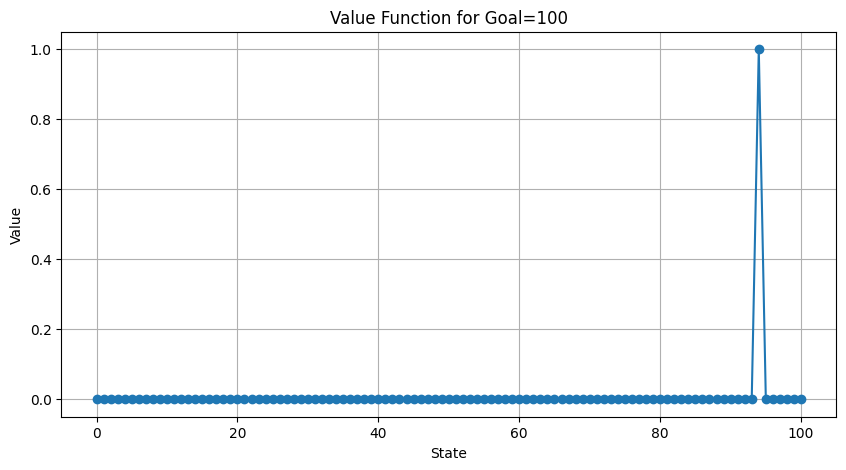

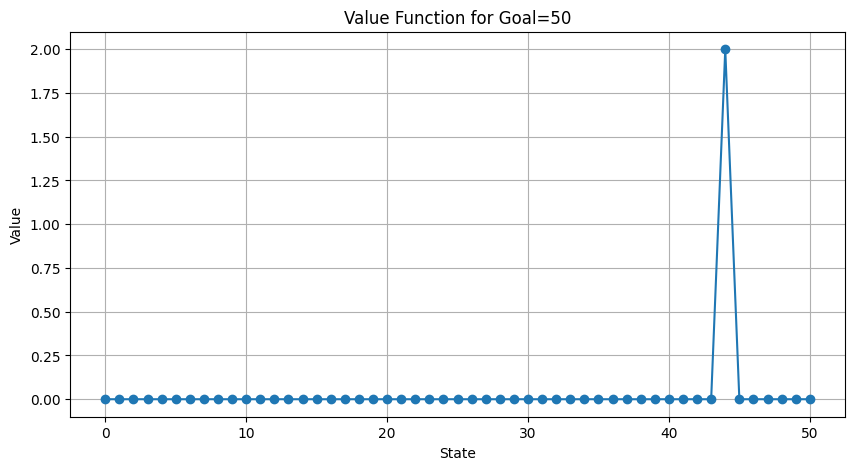

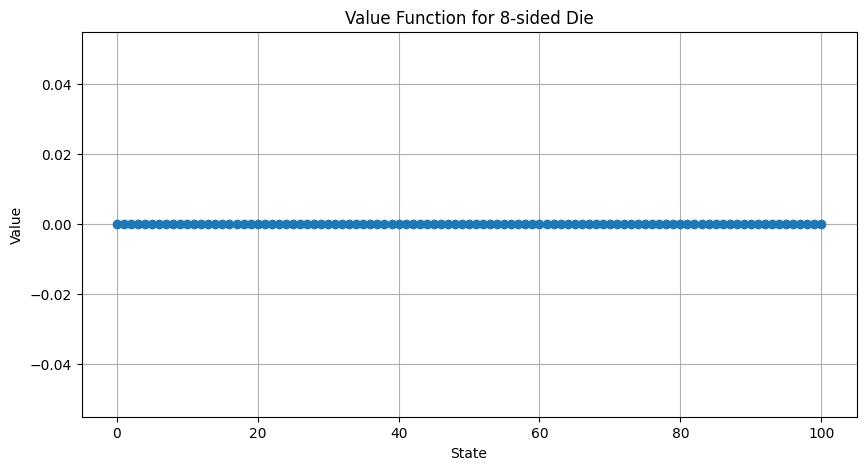

In [15]:
#-----write your code below this line---------
# Change the goal score to 50
env_50 = DiceGameEnvironment(goal=50, sides=6)
V_50 = np.zeros(env_50.goal + 1)
policy_50 = np.zeros(env_50.goal + 1, dtype=int)

# Compute the policy using the modified environment
policy_50 = policy_iteration(env_50, V_50, policy_50, gamma=1.0)
print_policy_and_values(policy_50, V_50)


# Change the die to have 8 sides
env_8_sides = DiceGameEnvironment(goal=100, sides=8)
V_8_sides = np.zeros(env_8_sides.goal + 1)
policy_8_sides = np.zeros(env_8_sides.goal + 1, dtype=int)

# Compute the policy with 8-sided die
policy_8_sides = policy_iteration(env_8_sides, V_8_sides, policy_8_sides, gamma=1.0)
print_policy_and_values(policy_8_sides, V_8_sides)

# Test with discount factor 0.9
policy_09 = np.zeros(env.goal + 1, dtype=int)
V_09 = np.zeros(env.goal + 1)
policy_09 = policy_iteration(env, V_09, policy_09, gamma=0.9)
print_policy_and_values(policy_09, V_09)

# Test with discount factor 0.95
policy_095 = np.zeros(env.goal + 1, dtype=int)
V_095 = np.zeros(env.goal + 1)
policy_095 = policy_iteration(env, V_095, policy_095, gamma=0.95)
print_policy_and_values(policy_095, V_095)

import matplotlib.pyplot as plt

# Function to plot the value function
def plot_value_function(V, title="Value Function"):
    plt.figure(figsize=(10, 5))
    plt.plot(V, marker='o')
    plt.title(title)
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

# Plotting the value function for the original 100-goal game
plot_value_function(V, "Value Function for Goal=100")

# Plotting for the modified game with a goal of 50
plot_value_function(V_50, "Value Function for Goal=50")

# Plotting for the game with an 8-sided die
plot_value_function(V_8_sides, "Value Function for 8-sided Die")

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for dice problem with the initial parameters and after chnaging the parameters.

`----write below this line------`

Conclusion
The exploration of the Dice Game through dynamic programming reveals significant insights into strategy optimization under varying conditions. Initially, with a goal of 100 and a 6-sided die, the optimal policy sharply increases the value as the state approaches the goal, indicating a high reward potential for strategic play in the final stages. This strategy suggests that rolling the die becomes increasingly favorable as the player nears the goal, supported by the value spike at the goal state due to the substantial reward for reaching exactly 100.

Reducing the goal to 50 modifies this landscape, with the value function again peaking towards the goal, but with a notable increase in value across all states. This change suggests that reaching a lower goal is more attainable within fewer moves, making aggressive play (continuing to roll rather than stopping) more advantageous earlier in the game.

Altering the die to have 8 sides, however, introduces a different dynamic. The value function flattens, indicating a more uniform value across states and a less dramatic increase near the goal. This variation may imply increased uncertainty or risk due to the broader range of possible outcomes with each roll, necessitating a more cautious approach throughout the game.

Furthermore, experimenting with different discount factors like 0.9 and 0.95 showed that discounting future rewards influences the optimal policy by slightly devaluing future states' potential gains. This adjustment subtly shifts the strategy towards more immediate rewards, especially as the player approaches the goal state.

In conclusion, the optimal approach to the Dice Game heavily depends on the game's configured parameters. The base case with a 6-sided die and a goal of 100 encourages a bold strategy as the goal nears, while modifications such as a lower goal or a die with more sides require adaptions in strategy reflecting the altered risk and reward structure. These insights underscore the necessity of tailoring strategies to specific game settings and objectives, utilizing dynamic programming as a powerful tool for revealing nuanced strategies in probabilistic games.